In [1]:
%matplotlib inline


# FDMT High DM time gaps investigation

There are so many problems here it's out of control.
The first is that I need to check why the HLS FDMT seems to give different answers at large DMs. I need to convince myself whose problem this is.
The second problem is that for large DMs the thing is disjoint. Which looks aweful.

In [36]:
import fdmt
reload(fdmt)
from pylab import *
import numpy as np
nf = 256# number of channels 
df = 1e-3 # Channel bandwidth in GHz
fmin = 0.716 # Fmin GHz
nd = 1024 # Number of DM trials to do
nt = 64 # Number of samples per block
tsamp = 1.0 # milliseconds
freqs = fmin + np.arange(nf)*df
thefdmt = fdmt.Fdmt(fmin, df, nf, nd, nt) # make FDMT       

In [37]:
ones = np.ones((nf, nt))
oneout = thefdmt(ones)
print(oneout.shape)

# Look at the very first time sample
t1 = oneout[:, 1]


(1, 1, 0, (256, 8, 64), 0.0, 1.0, 0.0)
(1, 2, 1, (256, 8, 64), 0.0, 2.0, 0.0)
(1, 3, 2, (256, 8, 64), 0.0, 3.0, 0.0)
(1, 4, 3, (256, 8, 64), 0.0, 4.0, 0.0)
(1, 5, 4, (256, 8, 64), 0.0, 5.0, 0.0)
(1, 6, 5, (256, 8, 64), 0.0, 6.0, 0.0)
(1, 7, 6, (256, 8, 64), 0.0, 7.0, 0.0)
(2, 2, 0, (256, 8, 64), 0.0, 1.0, 0.0)
(2, 3, 1, (256, 8, 64), 0.0, 2.0, 0.0)
(2, 4, 2, (256, 8, 64), 0.0, 3.0, 0.0)
(2, 5, 3, (256, 8, 64), 0.0, 4.0, 0.0)
(2, 6, 4, (256, 8, 64), 0.0, 5.0, 0.0)
(2, 7, 5, (256, 8, 64), 0.0, 6.0, 0.0)
(3, 3, 0, (256, 8, 64), 0.0, 1.0, 0.0)
(3, 4, 1, (256, 8, 64), 0.0, 2.0, 0.0)
(3, 5, 2, (256, 8, 64), 0.0, 3.0, 0.0)
(3, 6, 3, (256, 8, 64), 0.0, 4.0, 0.0)
(3, 7, 4, (256, 8, 64), 0.0, 5.0, 0.0)
(4, 4, 0, (256, 8, 64), 0.0, 1.0, 0.0)
(4, 5, 1, (256, 8, 64), 0.0, 2.0, 0.0)
(4, 6, 2, (256, 8, 64), 0.0, 3.0, 0.0)
(4, 7, 3, (256, 8, 64), 0.0, 4.0, 0.0)
(5, 5, 0, (256, 8, 64), 0.0, 1.0, 0.0)
(5, 6, 1, (256, 8, 64), 0.0, 2.0, 0.0)
(5, 7, 2, (256, 8, 64), 0.0, 3.0, 0.0)
(6, 6, 0, (256, 8, 64), 0

0.971 0.9714999999999999 0.716 0.7155 0.001


(-3, 3)

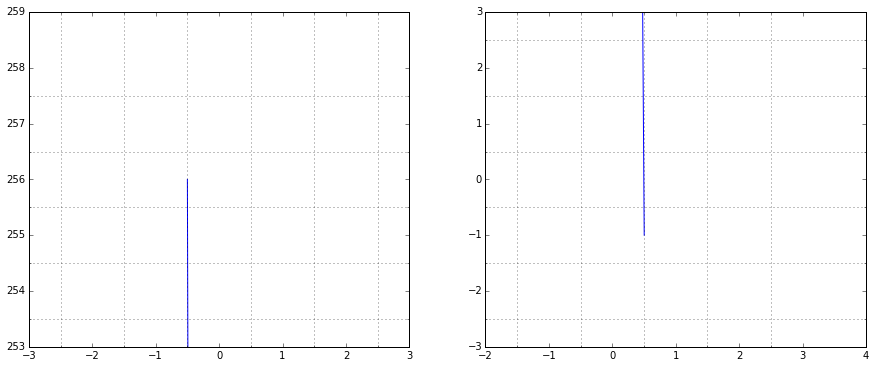

In [51]:

idm = nd -1 
#idm = 1.0
idm = 1.0
freqs = np.arange(nf)*df + fmin
ftop = freqs.max() + df*0.5
fbot = freqs.min() - df*0.5
print freqs.max(), ftop, freqs.min(), fbot, df
pltchans = np.arange(-1, nf+1)
pltfreqs = pltchans*df + fmin
channels = np.arange(nf)
delays = -(idm)*(pltfreqs**-2 - ftop**-2)/(ftop**-2 - fbot**-2)-0.5
xtk = np.arange(-3, idm+3) - 0.5
ytk = np.arange(-3, nf+3) - 0.5
fig, ax = subplots(1,2, figsize=(15, 6))
ax[0].plot(delays, pltchans)
ax[0].set_xticks(xtk, minor=True)
ax[0].set_yticks(ytk, minor=True)
ax[0].grid(True, 'minor')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(nf-3, nf+3)
   
ax[1].plot(delays, pltchans)
ax[1].set_xticks(xtk, minor=True)
ax[1].set_yticks(ytk, minor=True)
ax[1].grid(True, 'minor')
ax[1].set_xlim(idm-3, idm+3)
ax[1].set_ylim(-3, +3)

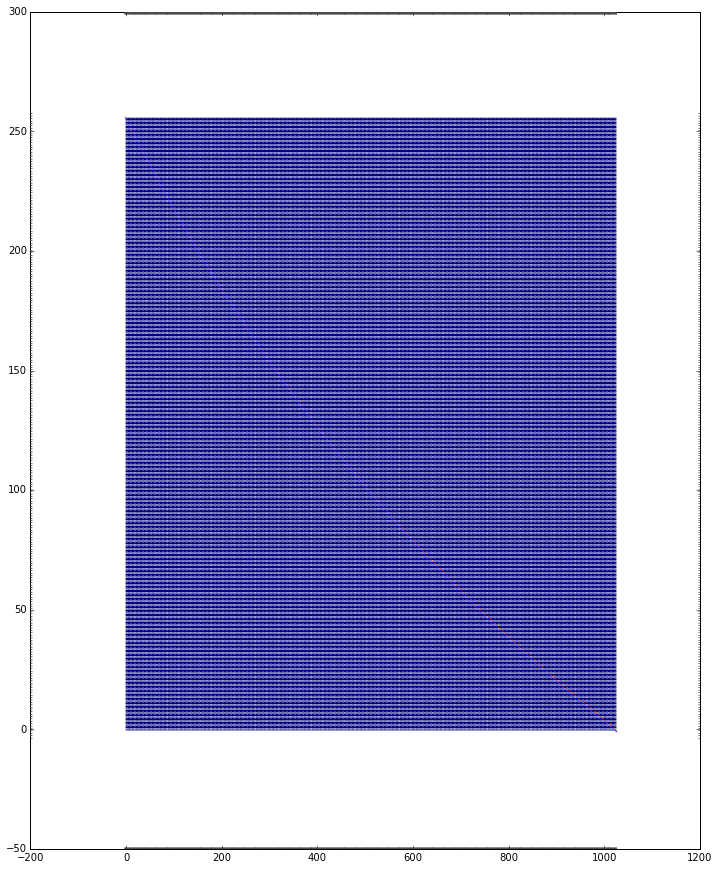

In [47]:
#idm = 1
lastdm_tf = np.zeros((nf, idm + 1))
lastdm_tf = thefdmt.add_frb_track(idm, lastdm_tf)
ny, nx = lastdm_tf.shape

fig, axs = subplots(1,1, figsize=(12,15))
axs.imshow(lastdm_tf, aspect='auto', origin='lower', interpolation='nearest')
axs.plot(delays, pltchans)
axs.set_xticks(xtk, minor=True)
axs.set_yticks(ytk, minor=True)
axs.grid(True, 'minor', c='white')
show()

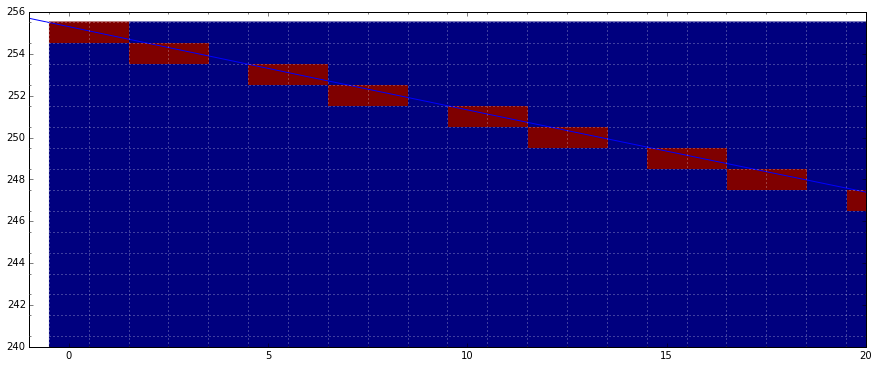

In [48]:
fig, axs = subplots(1,1, figsize=(15, 6))
axs.imshow(lastdm_tf, aspect='auto', origin='lower', interpolation='nearest')
axs.plot(delays, pltchans)
axs.set_xticks(xtk, minor=True)
axs.set_yticks(ytk, minor=True)
axs.grid(True, 'minor', c='white')
axs.set_xlim(-1,20)
axs.set_ylim(240, 256)
show()

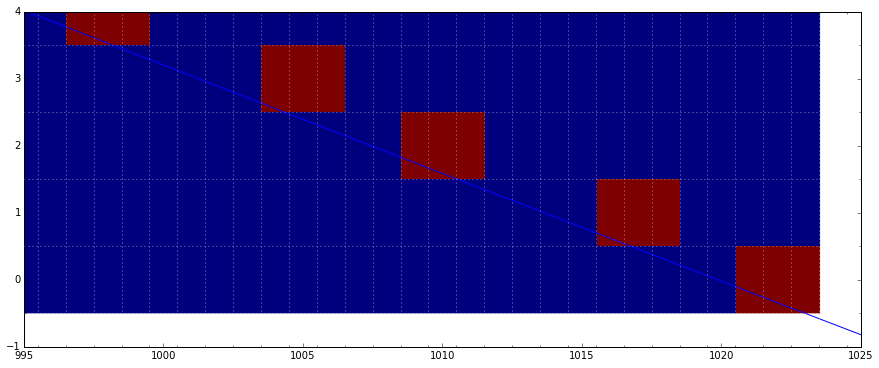

In [45]:
fig, axs = subplots(1,1, figsize=(15, 6))
axs.imshow(lastdm_tf, aspect='auto', origin='lower', interpolation='nearest')
axs.plot(delays, pltchans)
axs.set_xticks(xtk, minor=True)
axs.set_yticks(ytk, minor=True)
axs.grid(True, 'minor', c='white')
axs.set_xlim(995, idm+2)
axs.set_ylim(-1, 4)
show()

Looking at the plots above, a the bottom of the band the largest smearing across a single channels is 3 time slices. But I don't think that tallies with the calculations:

In [ ]:
print 'The FDMT calculates that the initialisation size is', thefdmt.init_delta_t, 'NDM IN for iter0 is', thefdmt.ndm_in_for_iter(0)

So if init_delta_t is 8, why is the actual FDMT only smearing up to 3 channels? That's absurd!

In [ ]:
# From first principles, I'd expect the smearing at the bottom of the channel to be roughtly
print 'Bottom channel smearing should be roughly', (nd-1)*(freqs[1]**-2 - freqs[0]**-2)/(freqs.max()**-2 - freqs.min()**-2)

Which is *TWICE* what it's currently doing (not even an off by one bannister - which is your usual trick). So ... WTF.

In [ ]:
# let's check a couple of things
fdmt.cff(freqs[1], freqs[0], freqs.max(), freqs.min())

In [ ]:
fdmt.calc_delta_t(freqs.max(), freqs.min(),freqs[1], freqs[0], nd)

In [ ]:
print 'Bottom frequencies should all be equal', thefdmt.f_min, freqs[0], freqs.min()
print 'Max frequencies should all be equal', thefdmt.f_max, freqs[-1], freqs.max()

In [ ]:
# The first iteration is arguably where the problem lies. So look at the ifrst iteration, bottom channel for the highest DM
iiter = 0
ichan = 0
for d in xrange(thefdmt.ndm_out_for_iter(0)):
    print 'd=', d, 'id1, id2, offset=', thefdmt.get_config(iiter, ichan, d)


Looking at the plot of the bottom channel, it looks like it's 3 hits on channel 0 and 3 hits on channel 1, with a time offset = 5. this should be an equivalent of id1=2, id2=2, toffset=5, i.e. (2, 2, 5) in the above list. And there it is at d=7, so there are so many problems here the mind boggles. Firstly: Why isn't it going for the d=13. And secondly, surely we require id1 + offset == id2 i.e. a continuos thing When Id1 stops, you should get ID2 on teh next sample. I think it's because the rounding isn't done correctly. 

But also, if you look at the bottom chanel it isn't quite fair, as it's only half of a channel. So really the second bottom channel you can indeed see that the trace crosses in about 6 or 7 samples (as calculated above). So by rights we should be looking at id2=5 or id2=6 at the very least, with a delay of ~ 10. WTF whis is so bad - OMG I'm a dead man.

# The first problem


In [ ]:
# the data for the first iteration, bottom subband.
# (f_start, f_end, f_middle, f_middle_larger, delta_t_local, idt_data)
thefdmt.hist_nf_data[0][0]

Looking at the plots, I'd say dt_local (if it means the largest DM across 2 channels) is about 13, so 14 is probably right. the channel frequencies look right (to within a 0.5 MHz offset)